# Task-2: Exploratory Data Analysis on Terrorism Dataset

# Name : Tallem Vaishnavi

# Importing all the libraries required for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing and observing the data

In [2]:
data=pd.read_csv(r'C:\Users\HP\Downloads\globalterrorismdb_0718dist.csv',encoding=('ISO-8859-1'),low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.shape

(181691, 135)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
for i in data.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

# Cleaning the data

In [6]:
data=data[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [7]:
data.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
data.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [8]:
data['Year'].nunique()

47

In [9]:
data['Region'].nunique()

12

In [10]:
data['Attack Type'].nunique()

9

In [11]:
data['Target Type'].nunique()

22

In [12]:
data['Group Name'].nunique()

3537

In [13]:
data['Weapon Type'].nunique()

12

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [15]:
data.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [16]:
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)

In [17]:
data.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed                 0
Wounded                0
Add Notes         153402
dtype: int64

In [18]:
data["Casualty"]=data["Killed"]+data["Wounded"]

In [19]:
data.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0


In [20]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# Visualizing the data

# 1. Year wise Attacks

In [21]:
attacks=data["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns = {'index' : 'Year','Year' : 'Attacks'}).set_index('Year')
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


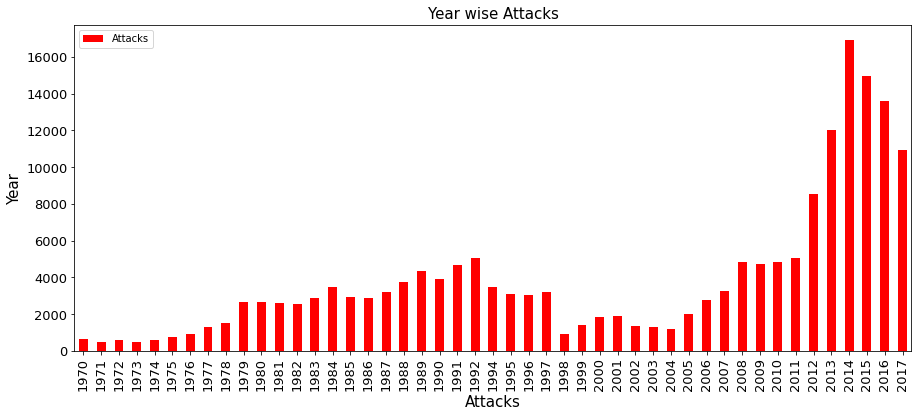

In [22]:
attacks.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Year wise Attacks",fontsize=15)
plt.xlabel("Attacks",fontsize=15)
plt.ylabel("Year",fontsize=15)
plt.show()

In [23]:
Casualties = data[["Year","Casualty"]].groupby("Year").sum()
Casualties.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


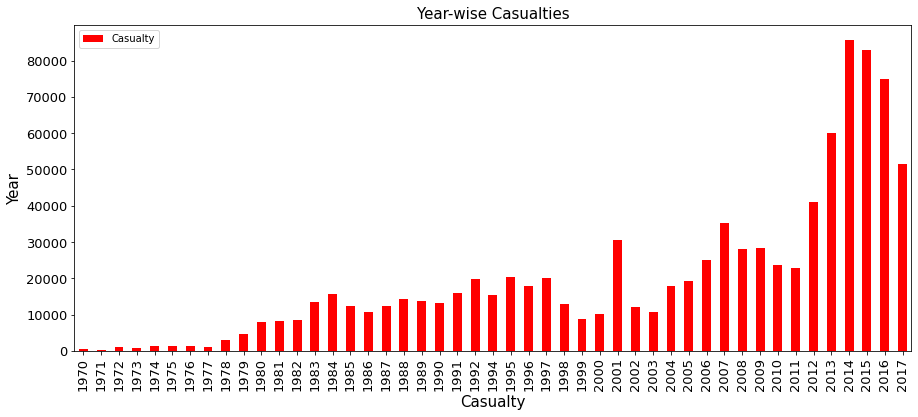

In [24]:
Casualties.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Year-wise Casualties",fontsize=15)
plt.xlabel("Casualty",fontsize=15)
plt.ylabel("Year",fontsize=15)
plt.show()

In [25]:
killed=data[["Year","Killed"]].groupby("Year").sum()
killed.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [26]:
wounded=data[["Year","Wounded"]].groupby("Year").sum()
wounded.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


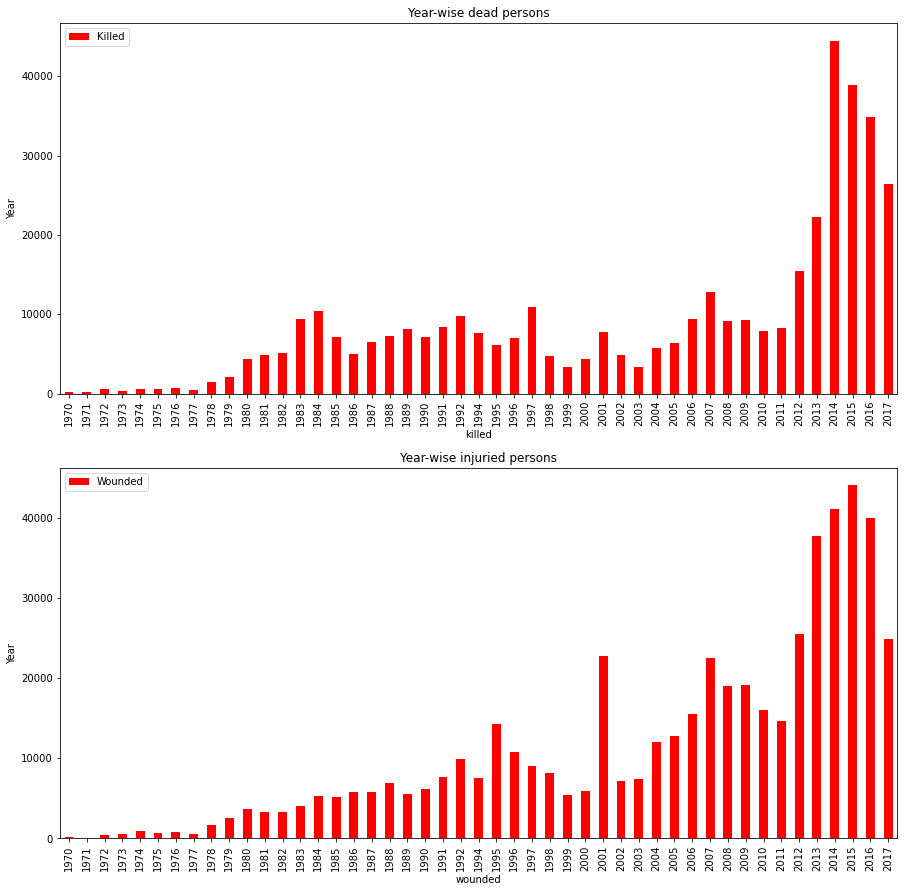

In [27]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)


killed.plot(kind="bar",color="red",figsize=(15,15),ax=ax0)
ax0.set_title("Year-wise dead persons")
ax0.set_xlabel("killed")
ax0.set_ylabel("Year")


wounded.plot(kind="bar",color="red",figsize=(15,15),ax=ax1)
ax1.set_title("Year-wise injuried persons")
ax1.set_xlabel("wounded")
ax1.set_ylabel("Year")

plt.show()

# 2. Region wise Attacks

In [28]:
reg=pd.crosstab(data.Year,data.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


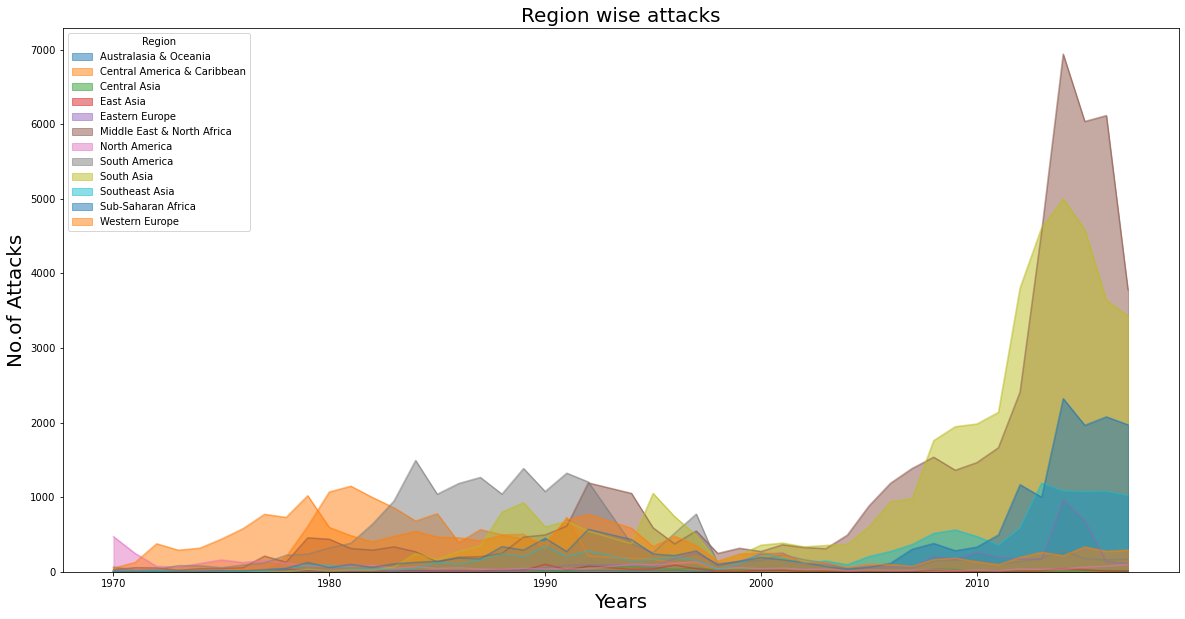

In [29]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("No.of Attacks",fontsize=20)
plt.show()

In [30]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
regions=regt["Total"].sort_values(ascending=False)
regions

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

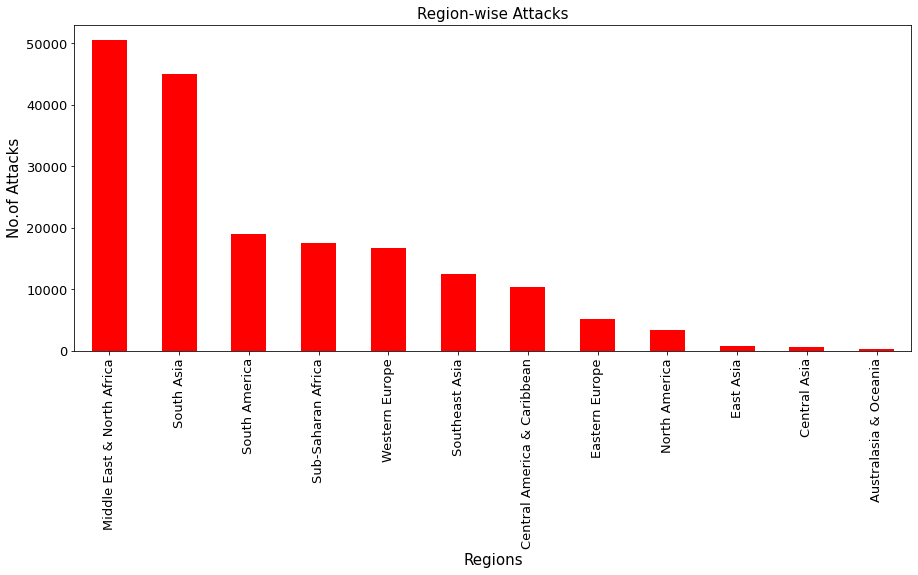

In [31]:
regions.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Region-wise Attacks",fontsize=15)
plt.xlabel("Regions",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [32]:
r_casualties=data[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
r_casualties

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


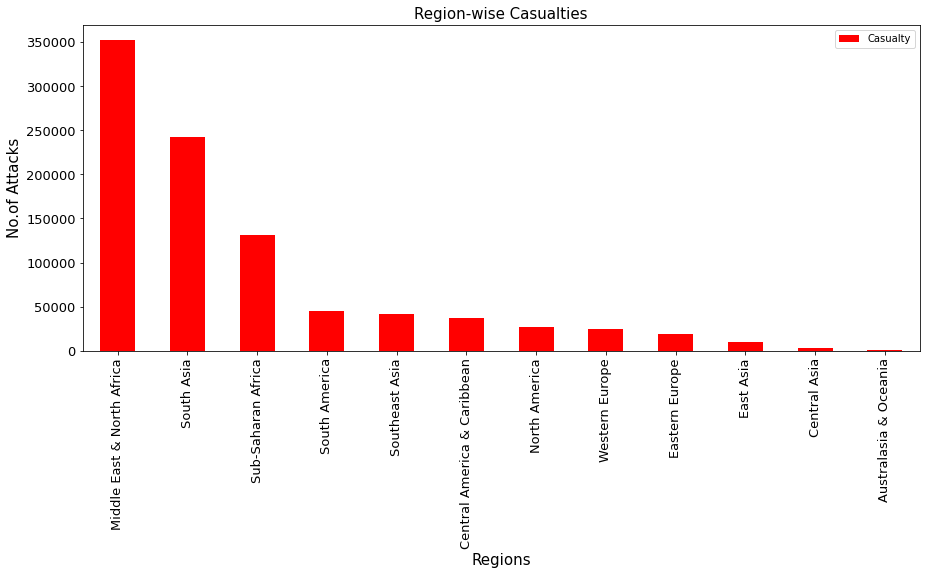

In [33]:
r_casualties.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Region-wise Casualties",fontsize=15)
plt.xlabel("Regions",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [34]:
r_killed=data[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
r_killed

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [35]:
r_wounded=data[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
r_wounded

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


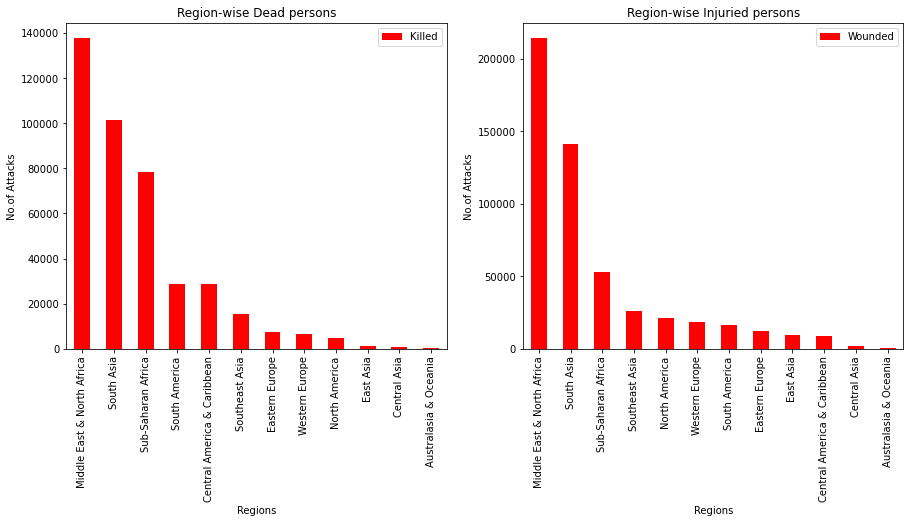

In [36]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
r_killed.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("Region-wise Dead persons")
ax0.set_xlabel("Regions")
ax0.set_ylabel("No.of Attacks")

#Wounded
r_wounded.plot(kind="bar",color="red",figsize=(15,6),ax=ax1)
ax1.set_title("Region-wise Injuried persons")
ax1.set_xlabel("Regions")
ax1.set_ylabel("No.of Attacks")

plt.show()

# 3. Country wise Attacks

In [37]:
country=data["Country"].value_counts().head(10)
country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

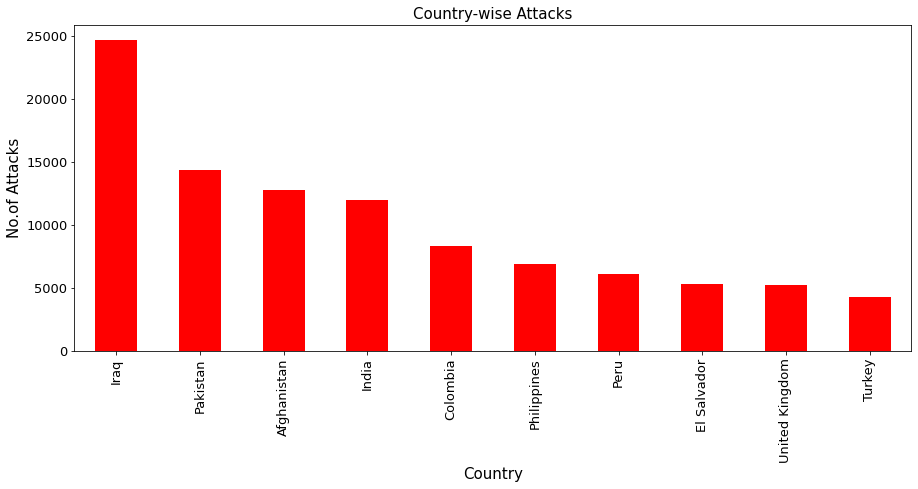

In [38]:
country.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Country-wise Attacks",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [39]:
c_casualties=data[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False).head(10)
c_casualties

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


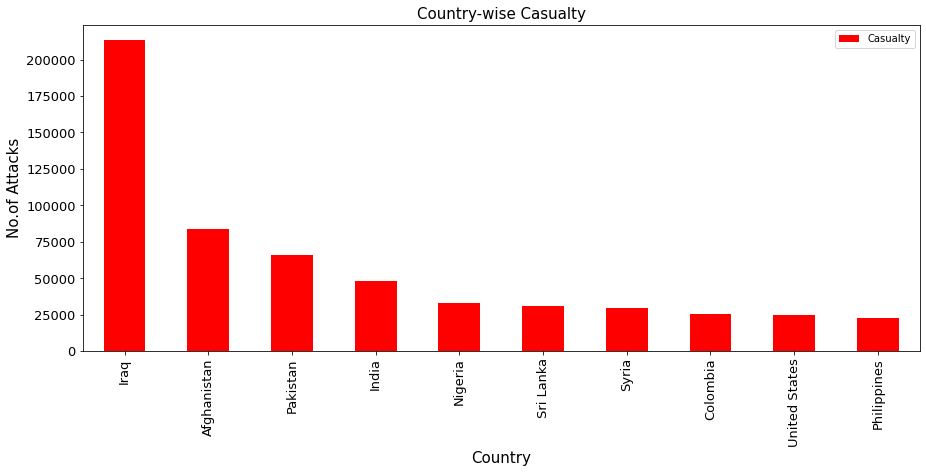

In [40]:
c_casualties.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Country-wise Casualty",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [41]:
c_killed=data[["Killed","Country"]].groupby("Country").sum().sort_values(by="Killed",ascending=False).head(10)
c_killed

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [42]:
c_wounded=data[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False).head(10)
c_wounded

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


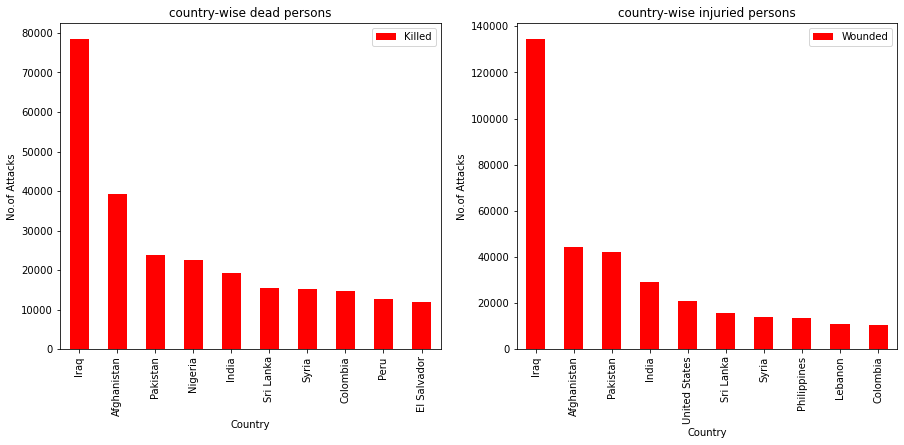

In [43]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
c_killed.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("country-wise dead persons")
ax0.set_xlabel("Country")
ax0.set_ylabel("No.of Attacks")


#wounded
c_wounded.plot(kind="bar",color="red",figsize=(15,6),ax=ax1)
ax1.set_title("country-wise injuried persons")
ax1.set_xlabel("Country")
ax1.set_ylabel("No.of Attacks")

plt.show()

# 4. City wise Attacks

In [44]:
city=data["City"].value_counts().head(10)[1:]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

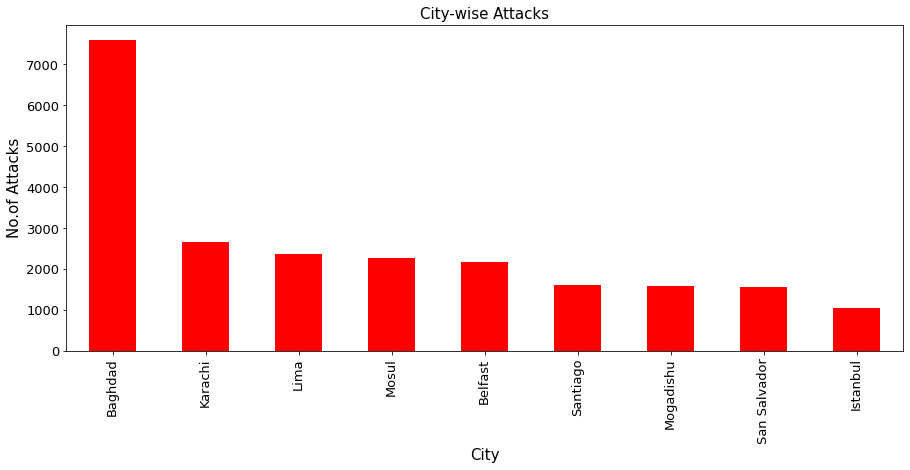

In [45]:
city.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("City-wise Attacks",fontsize=15)
plt.xlabel("City",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [46]:
city_casualties=data[["Casualty","City"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
city_casualties

,Casualty
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


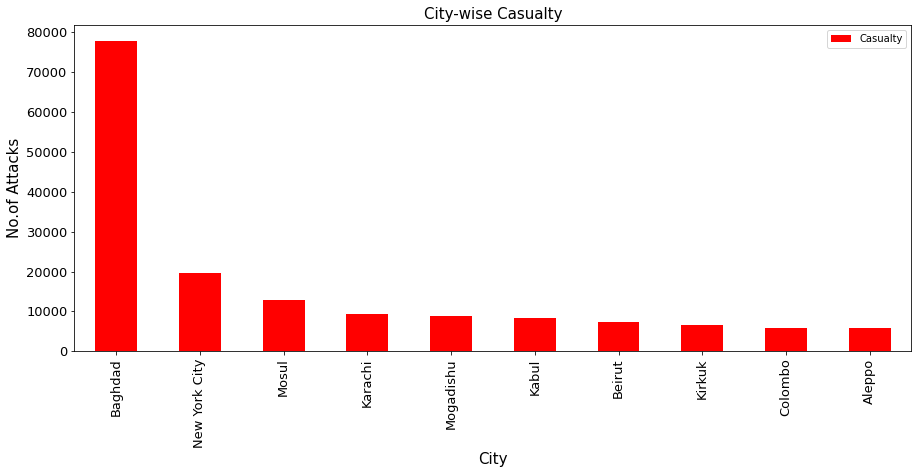

In [47]:
city_casualties.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("City-wise Casualty",fontsize=15)
plt.xlabel("City",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [48]:
city_killed=data[["Killed","City"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
city_killed

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


In [49]:
city_wounded=data[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
city_wounded

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


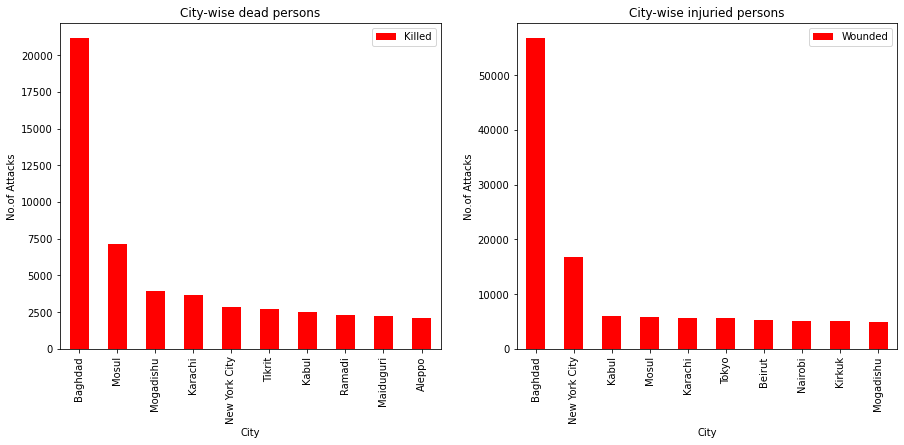

In [50]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
city_killed.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("City-wise dead persons")
ax0.set_xlabel("City")
ax0.set_ylabel("No.of Attacks")

#wounded
city_wounded.plot(kind="bar",color="red",figsize=(15,6),ax=ax1)
ax1.set_title("City-wise injuried persons")
ax1.set_xlabel("City")
ax1.set_ylabel("No.of Attacks")

plt.show()

# 5. Terrorist Group wise Attacks

In [51]:
group_name=data["Group Name"].value_counts()[1:].head(10)
group_name

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group Name, dtype: int64

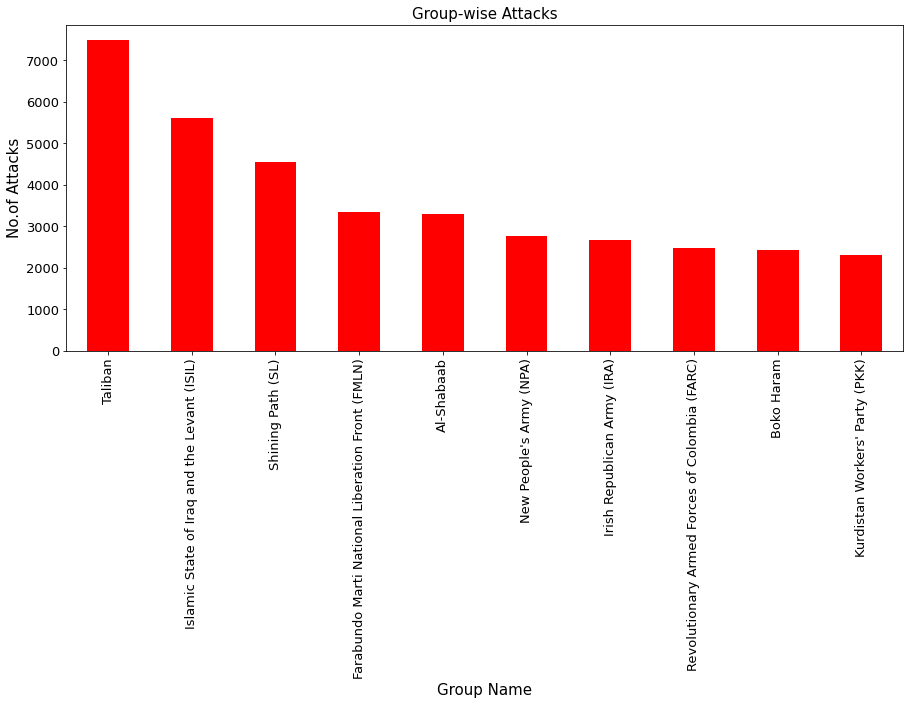

In [52]:
group_name.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Group-wise Attacks",fontsize=15)
plt.xlabel("Group Name",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [53]:
g_casualties=data[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
g_casualties

,Casualty
Group Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


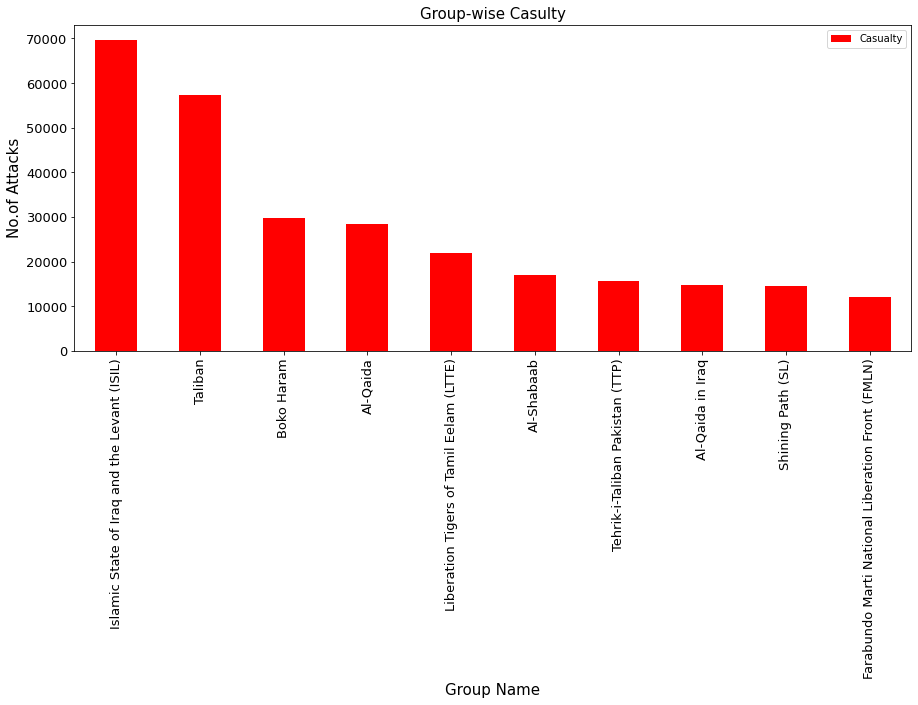

In [54]:
g_casualties.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Group-wise Casulty",fontsize=15)
plt.xlabel("Group Name",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [55]:
g_killed=data[["Killed","Group Name"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
g_killed

,Killed
Group Name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


In [56]:
g_wounded=data[["Wounded","Group Name"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
g_wounded

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


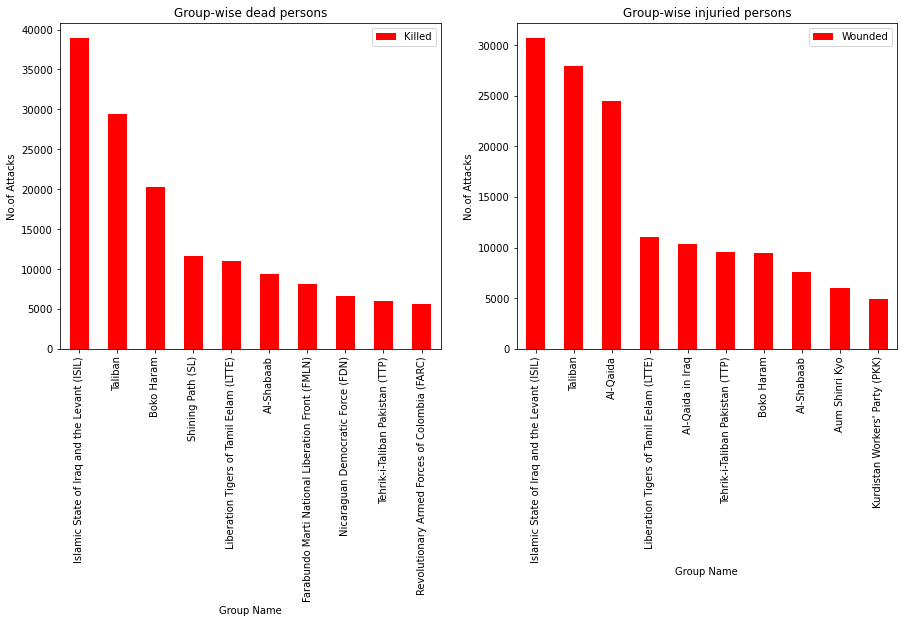

In [57]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
g_killed.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("Group-wise dead persons")
ax0.set_xlabel("Group Name")
ax0.set_ylabel("No.of Attacks")

#wounded
g_wounded.plot(kind="bar",color="red",figsize=(15,6),ax=ax1)
ax1.set_title("Group-wise injuried persons")
ax1.set_xlabel("Group Name")
ax1.set_ylabel("No.of Attacks")

plt.show()

# 6. Attack Type wise Attacks¶

In [58]:
attack_type=data["Attack Type"].value_counts().drop("Unknown").head(10)
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

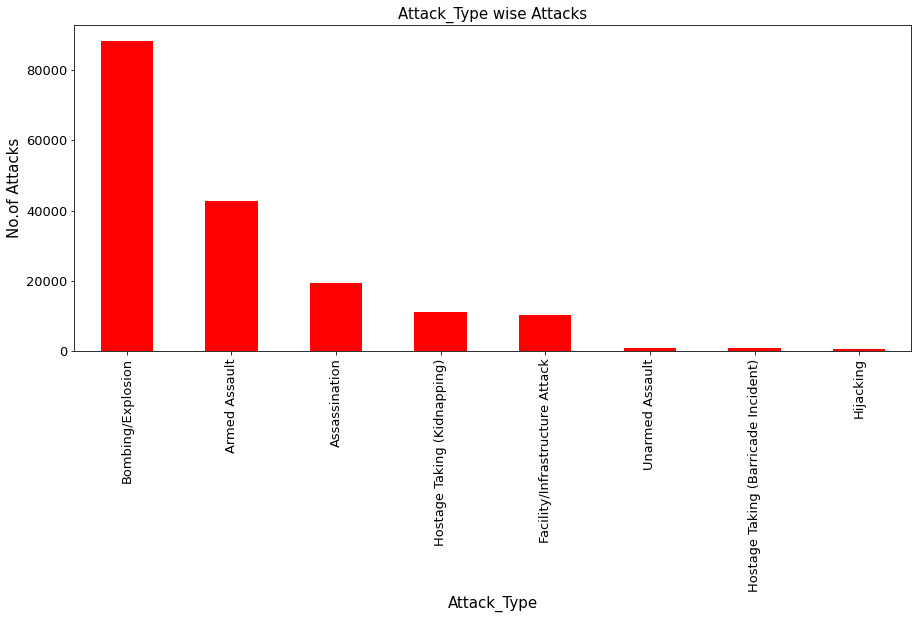

In [59]:
attack_type.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Attack_Type wise Attacks",fontsize=15)
plt.xlabel("Attack_Type",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [60]:
a_casualties=data[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
a_casualties

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


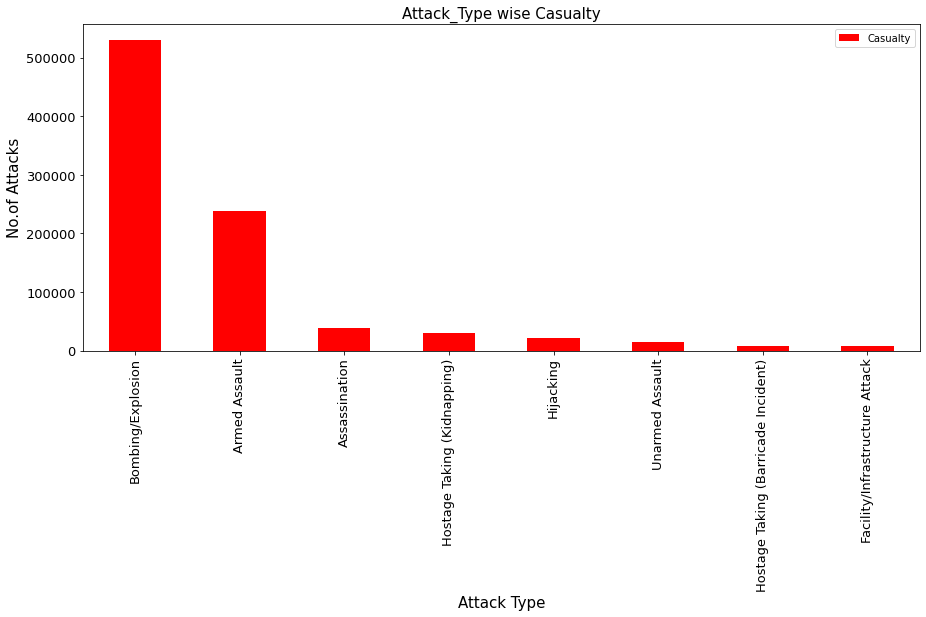

In [61]:
a_casualties.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Attack_Type wise Casualty",fontsize=15)
plt.xlabel("Attack Type",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [62]:
a_killed=data[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
a_killed

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


In [63]:
a_wounded=data[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
a_wounded

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


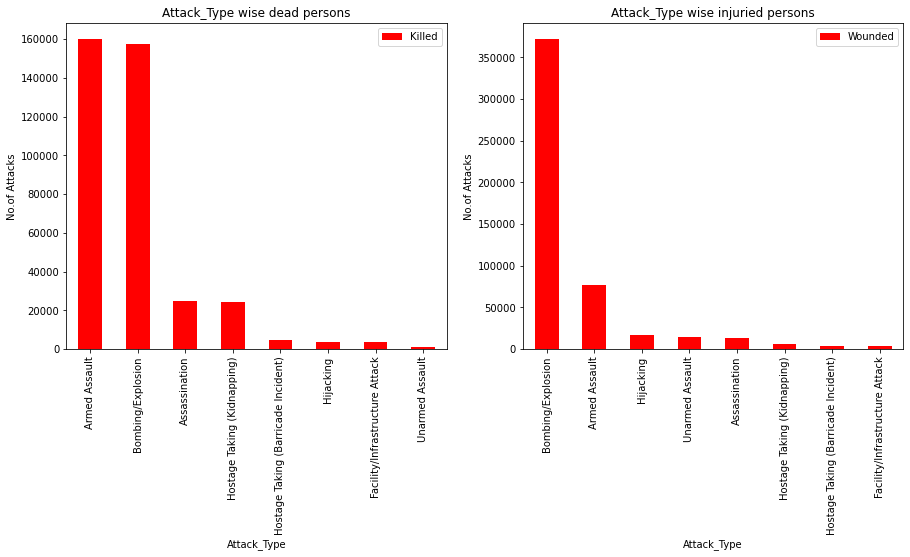

In [64]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
a_killed.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("Attack_Type wise dead persons")
ax0.set_xlabel("Attack_Type")
ax0.set_ylabel("No.of Attacks")

#wounded
a_wounded.plot(kind="bar",color="red",figsize=(15,6),ax=ax1)
ax1.set_title("Attack_Type wise injuried persons")
ax1.set_xlabel("Attack_Type")
ax1.set_ylabel("No.of Attacks")

plt.show()

# 7. Target Type wise Attacks

In [65]:
target_type=data["Target Type"].value_counts().drop("Unknown")
target_type

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

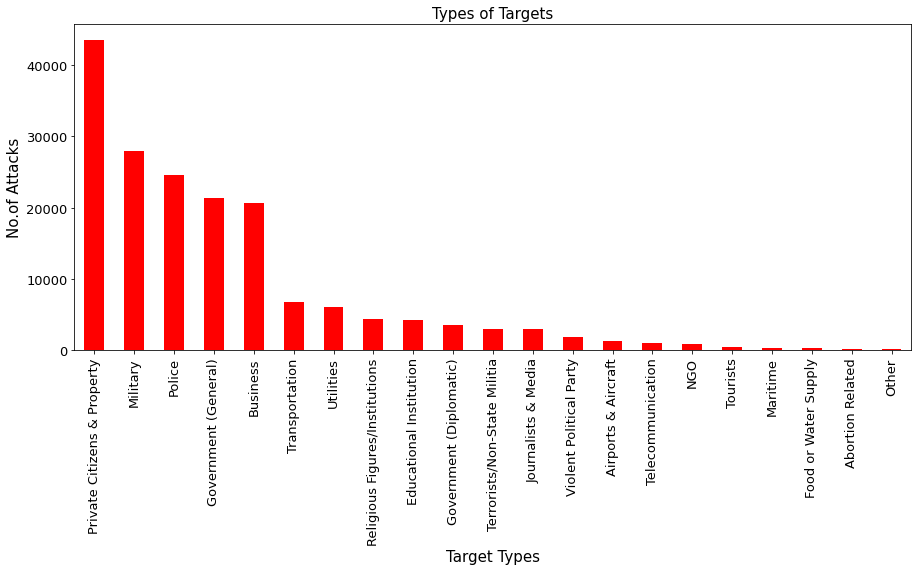

In [66]:
target_type.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Types of Targets",fontsize=15)
plt.xlabel("Target Types",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [67]:
t_casualties=data[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)
t_casualties

,Casualty
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


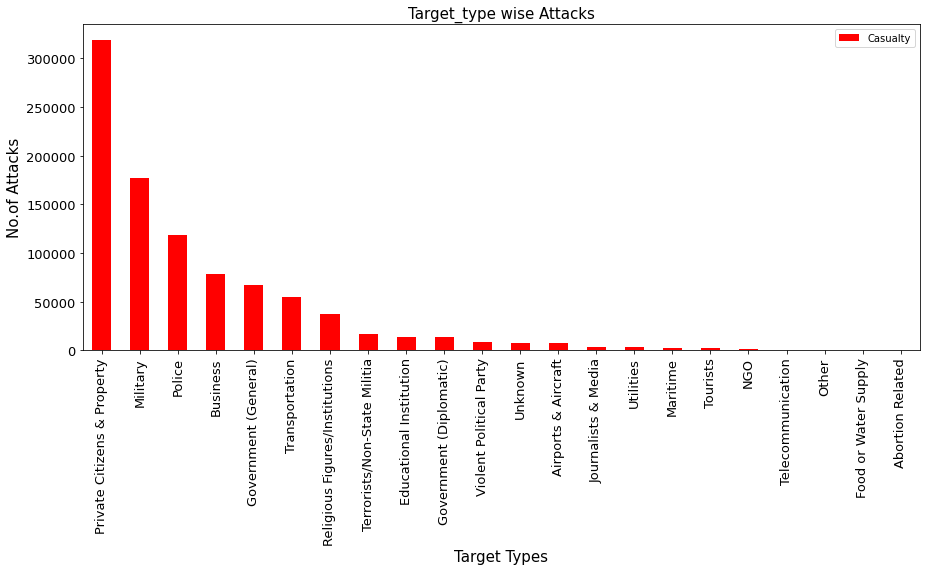

In [68]:
t_casualties.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Target_type wise Attacks",fontsize=15)
plt.xlabel("Target Types",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [69]:
t_killed=data[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
t_killed

,Killed
Target Type,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


In [70]:
t_wounded=data[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
t_wounded

,Wounded
Target Type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


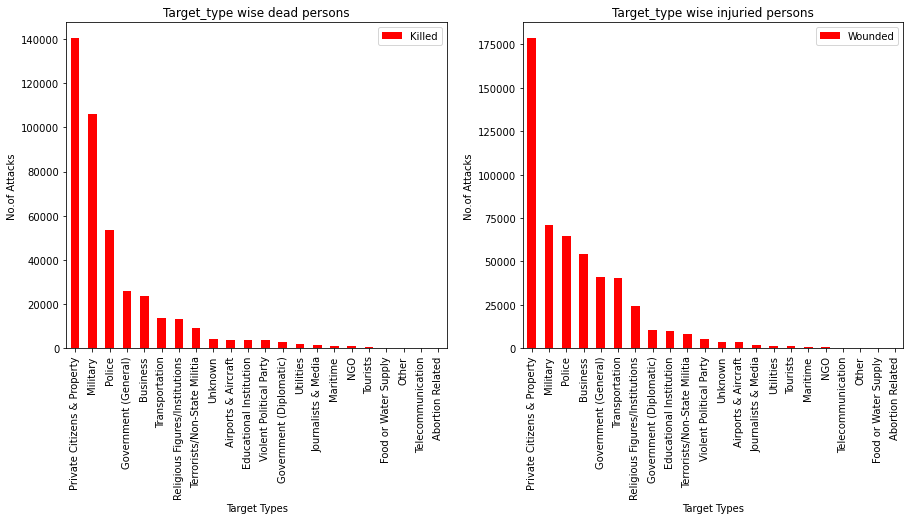

In [71]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
t_killed.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("Target_type wise dead persons")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("No.of Attacks")

#Wounded
t_wounded.plot(kind="bar",color="red",figsize=(15,6),ax=ax1)
ax1.set_title("Target_type wise injuried persons")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("No.of Attacks")
plt.show()

# 8. Group + Country wise

In [72]:
group_name=data[["Group Name","Country"]].value_counts().head(10)
group_name

Group Name                                        Country    
Unknown                                           Iraq           18520
                                                  Pakistan       10891
Taliban                                           Afghanistan     7423
Unknown                                           Afghanistan     4806
Islamic State of Iraq and the Levant (ISIL)       Iraq            4797
Shining Path (SL)                                 Peru            4541
Unknown                                           India           4263
Farabundo Marti National Liberation Front (FMLN)  El Salvador     3330
Unknown                                           Thailand        3007
Al-Shabaab                                        Somalia         2867
dtype: int64

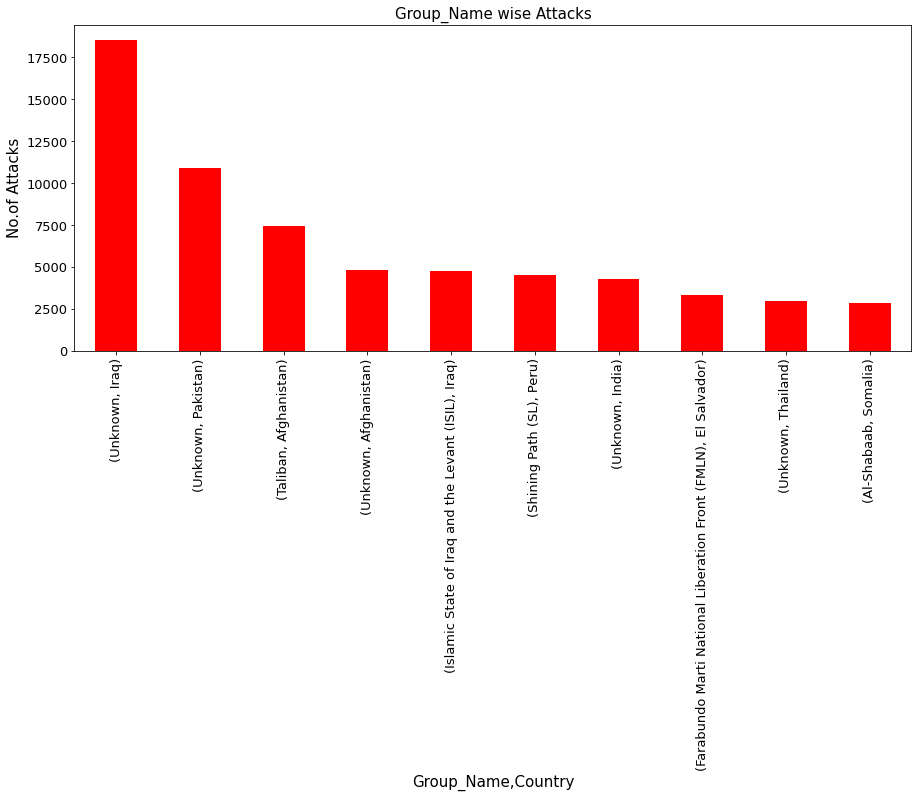

In [73]:
group_name.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Group_Name wise Attacks",fontsize=15)
plt.xlabel("Group_Name,Country",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [74]:
g_casualties=data[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).head(10)
g_casualties

,,Casualty
Group Name,Country,
Unknown,Iraq,129589.0
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Unknown,Pakistan,34570.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Unknown,Afghanistan,19787.0
Al-Qaida,United States,19494.0
Unknown,India,15631.0


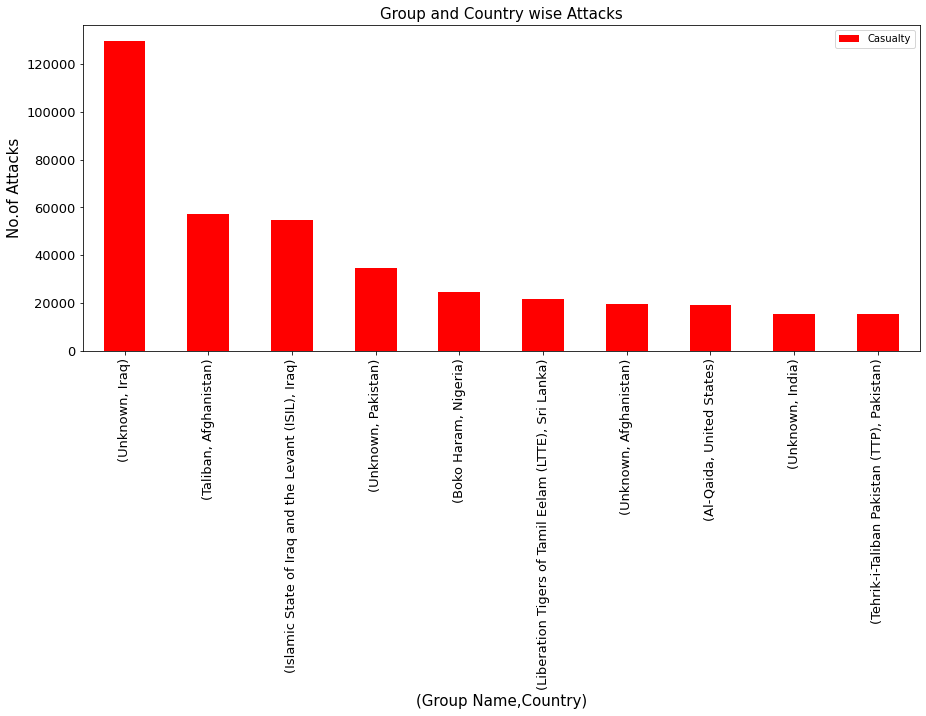

In [75]:
g_casualties.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Group and Country wise Attacks",fontsize=15)
plt.xlabel("(Group Name,Country)",fontsize=15)
plt.ylabel("No.of Attacks",fontsize=15)
plt.show()

In [76]:
gr_killed=data[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).head(10)
gr_killed

,,Killed
Group Name,Country,
Unknown,Iraq,38560.0
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Unknown,Pakistan,12023.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0


In [77]:
gr_wounded=data[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).head(10)
gr_wounded

,,Wounded
Group Name,Country,
Unknown,Iraq,91029.0
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Unknown,Pakistan,22547.0
Al-Qaida,United States,16493.0
Unknown,Afghanistan,12389.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Unknown,India,10879.0
Al-Qaida in Iraq,Iraq,10075.0


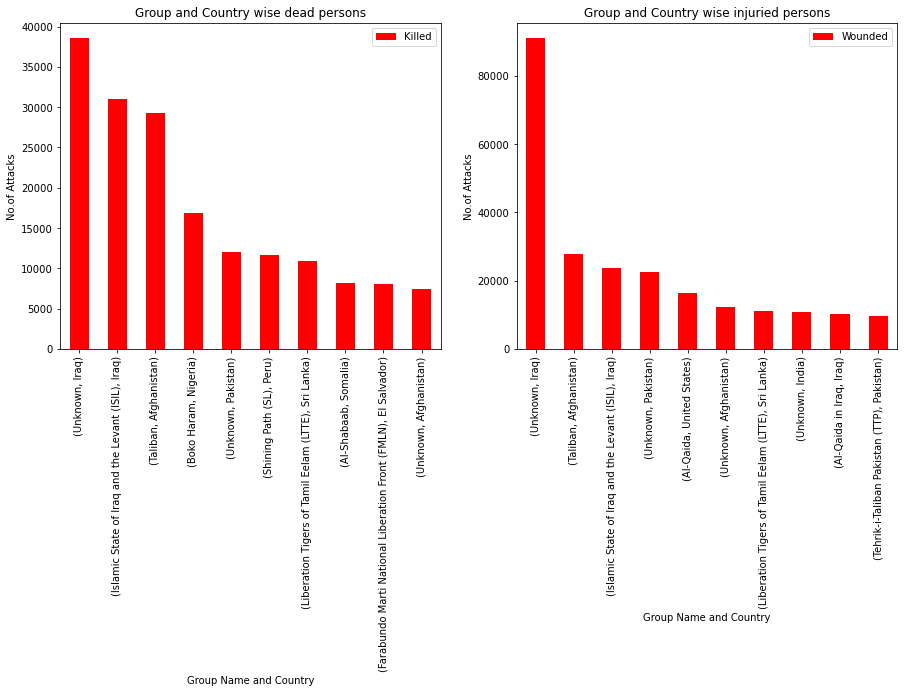

In [78]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gr_killed.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("Group and Country wise dead persons")
ax0.set_xlabel("Group Name and Country")
ax0.set_ylabel("No.of Attacks")

#Wounded
gr_wounded.plot(kind="bar",color="red",figsize=(15,6),ax=ax1)
ax1.set_title("Group and Country wise injuried persons")
ax1.set_xlabel("Group Name and Country")
ax1.set_ylabel("No.of Attacks")
plt.show()

# 9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017¶

In [85]:
casualty=data.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0


In [86]:
Dead_Persons=data.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",Dead_Persons)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0


In [87]:
Injuried_Persons=data.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",Injuried_Persons)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0
